# AIRCRAFT SAFETY RISKS ANALYSIS 

## 1.0 BUSINESS UNDERSTANDING


### 1.1 BUSINESS PROBLEM

The company is expanding in to new industries to diversify its portfolio. Specifically, we are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. We need to determine which aircraft are the lowest risk for the company to start this new business endeavor. Thereafter translate the findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

### 1.2 PROJECT OVERVIEW

This project aims to analyze historical aviation accident and incident data from the National Transportation Safety Board (NTSB) to provide actionable insights for the company which is planning to expand into the aviation sector. The primary goal is to identify aircraft types with the lowest risk profiles, enabling informed decision-making for fleet acquisition. By leveraging data cleaning, exploratory analysis, and visualization techniques, this project will uncover trends in accident frequency, causes, and contributing factors. The findings will inform strategic recommendations to mitigate risks and ensure the safety and reliability of operations in the company's new aviation division.

### 1.3 OBJECTIVES

The objective is to provide actionable insights for the company by determining the lowest-risk aircraft types for purchase and operation. This analysis aims to:

1. Identify high risk aircraft make and category.
2. Determine factors contributing to aircarft accidents, such as operator type, weather conditions, or flight phase.
3. Provide additional data insights to support informed business decisions.

### 1.4 METHODOLOGY

This aviation data is analyzed using the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework as a methodology, and is outlined as follows:

1. Business Understanding
2. Data Understanding
3. Data Analysis
4. Conclusions
5. Recommendations

## 2.0 DATA UNDERSTANDING

The dataset used in this project is from the National Transportation Safety Board (NTSB) that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

### 2.1 DATA PRE-PROCESSING

In [1]:
# Import pandas library

import pandas as pd

In [2]:
#load the csv file
#Due to mixed data types in specific columns,a code modification was done

df = pd.read_csv("C:/Users/sylvi/Downloads/AviationData.csv/AviationData.csv", encoding='cp1252', low_memory=False)


In [3]:
#View the first 5 rows of the dataframe

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#View the last 5 rows of the dataframe

df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


From this dataset, it is clear that there is some missing data in several columns, such as Latitude, Longitude, Weather.Condition, Report.Status, and Publication.Date. Handling missing data (either through imputation or exclusion) may be necessary for analysis. The dataset also seems to focus on private, non-commercial aviation accidents, as seen on Purpose.of.flight column e.g  Personal.

In [5]:
# Understand further the columns/measurements available in the dataset

df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
# Check dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [7]:
#Check the dataset descriptions

df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


The DataFrame contains 88,889 rows of data and there are 31 columns in the dataset.

The data type of each column includes:
1. Object indicating string or categorical data (e.g., Event.Id, Investigation.Type).
2. float64 indicating numerical data with decimals (e.g., Total.Fatal.Injuries).
3. NaN which represents missing values 

It is important to note the non-null values in most columns like Latitude or Longitude a few non-null values, meaning some rows have missing data for these columns.

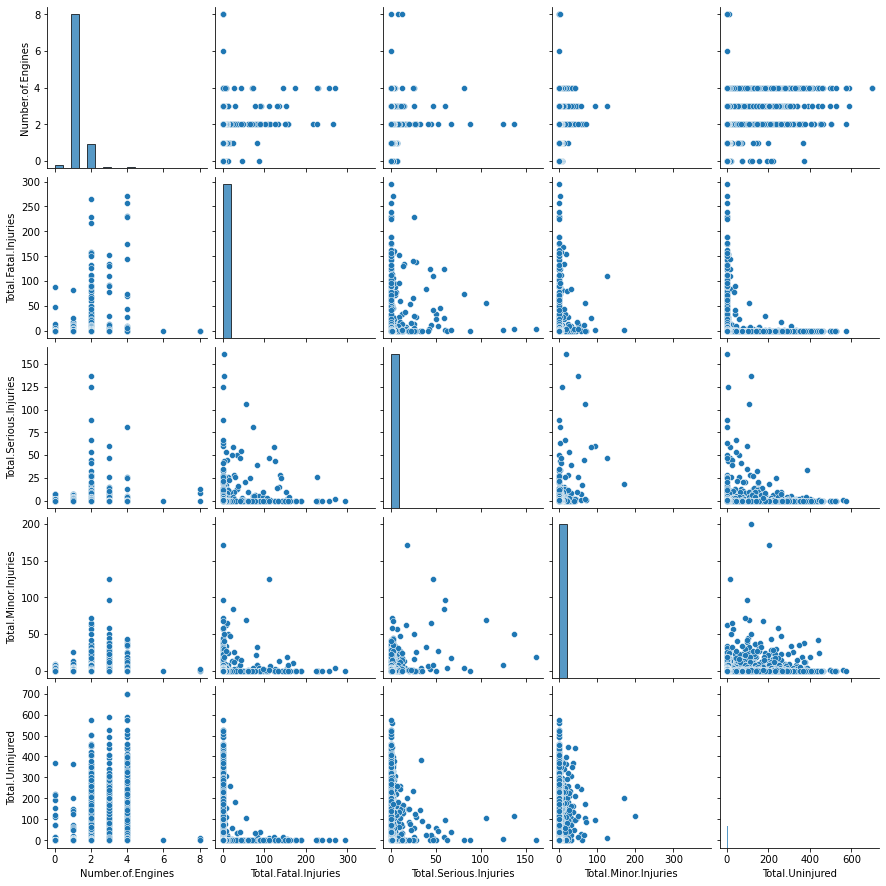

In [8]:
# Check the general distribution of the dataset

import seaborn as sns
sns.pairplot(df)

### 2.2 HANDLING MISSING DATA

The dataset contains some missing values in the measurements which we have to fix. This will be done by either replacing (Imputing) missing values with frequent values or dropping (exculding) the missing values altogether. 

In [9]:
# Identify missing Values

df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

Only dropping columns with missing values is not a good option here since it will drop over 90% of the Columns which have relevant data as below. We therefore will proceed to drop columns with 100% missing values and impute the rest of the missing values.

In [10]:
# Drop columns with missing values

df.dropna(axis = 1).head()  

,Event.Id,Investigation.Type,Accident.Number,Event.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24
1,20001218X45447,Accident,LAX94LA336,1962-07-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30
3,20001218X45448,Accident,LAX96LA321,1977-06-19
4,20041105X01764,Accident,CHI79FA064,1979-08-02


In [11]:
# Drop columns with 100% missing values 

df.dropna(axis=1 , how = 'all', inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### 2.3 HANDLING MISSING DATA (IMPUTATION)

In [12]:
#Replace missing values with mode and median values

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].median())

In [13]:
# Check for missing values again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Latitude                88889 non-null  object 
 7   Longitude               88889 non-null  object 
 8   Airport.Code            88889 non-null  object 
 9   Airport.Name            88889 non-null  object 
 10  Injury.Severity         88889 non-null  object 
 11  Aircraft.damage         88889 non-null  object 
 12  Aircraft.Category       88889 non-null  object 
 13  Registration.Number     88889 non-null  object 
 14  Make                    88889 non-null

### 2.4 HANDLING DUPLICATES

In [14]:
df.duplicated().sum()

0

There are no duplicates in this dataset, hence we will proceed with data analysis.

## 3.0 DATA  ANALYSIS

In [15]:
# Import relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### 3.1 Objective 1 : Identifying High Risk Aircraft Make and Category 

#### Scatter plot of Total.Fatal.Injuries vs Total.Serious.Injuries based on Aircraft Category

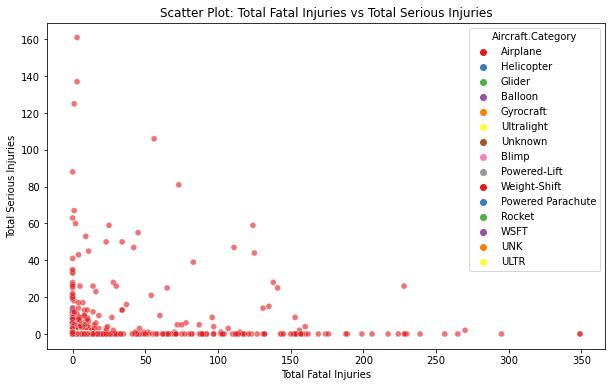

In [16]:
# Scatterplot visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total.Fatal.Injuries', y='Total.Serious.Injuries', hue='Aircraft.Category', palette='Set1', alpha=0.6)

#Plot
plt.title('Scatter Plot: Total Fatal Injuries vs Total Serious Injuries')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Total Serious Injuries')

plt.show()


- The plot shows that the highest occurrences for both the Serious and Fatal Injuries observed in the "Airplane" aircraft category. 
- Accidents here are attributed to this aircraft category having a wide range of aircraft types, from small general aviation planes to large commercial airliners and other factors such as usage, and operational environment.

#### Line Chart : Trends in Accidents Over Time for Specific Make or Model Aircraft

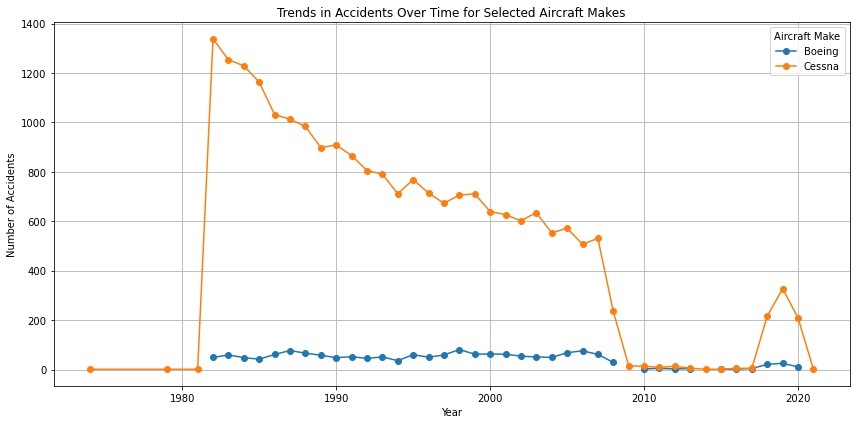

In [17]:
# Convert Event.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Filter data for specific aircraft Makes or Models (in this case: 'Cessna' and 'Boeing')
selected_aircraft = df[df['Make'].isin(['Cessna', 'Boeing'])]

# Group data by Event.Date and Make
trends = selected_aircraft.groupby([df['Event.Date'].dt.year, 'Make']).size().unstack()

# Plot
trends.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Trends in Accidents Over Time for Selected Aircraft Makes')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Aircraft Make')
plt.grid()
plt.tight_layout()
plt.show()

- It is observed from  the chart above that the Cessna type of aircraft (commonly used in general aviation) experienced the highest number of accidents occurring in the early 1980s and peaking again in n 2019,where several regions experienced unusual weather patterns that may have contributed to the rise in accidents involving smaller aircraft.In comparison, the Boeing type of aircraft consistently experienced less than 100 accidents between 1980 and 2020.
- This can be largely attributed to their widespread use in general aviation, where pilot experience, weather conditions, and less advanced safety systems play a larger role in accidents. In comparison, Boeing's commercial aircraft have consistently had lower accident rates due to rigorous regulations, advanced safety systems, and professional pilots. 

#### Heatmap: Correlation Between Number of Engines, Engine Type, and Accident Severity

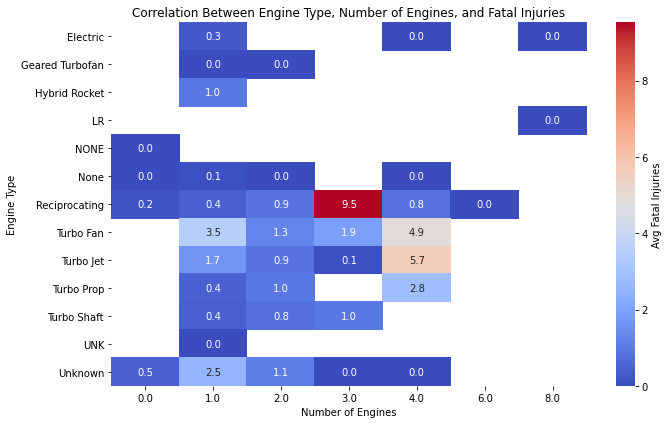

In [18]:
# Filter and pivot the data
heatmap_data = df.pivot_table(
    index='Engine.Type', 
    columns='Number.of.Engines', 
    values='Total.Fatal.Injuries', 
    aggfunc='mean'
)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.1f', cbar_kws={'label': 'Avg Fatal Injuries'})
plt.title('Correlation Between Engine Type, Number of Engines, and Fatal Injuries')
plt.ylabel('Engine Type')
plt.xlabel('Number of Engines')
plt.tight_layout()
plt.show()


- The heatmap suggests a strong positive correlation between the number of engines and accident severity.The average fatal injuries increase as the number of engines increases, and is highest at three engines for the Reciprocating engine type. 
- It implies that accidents involving more engines are generally more severe.

#### Horizontal Bar Chart: Top Aircraft Makes with the Most/Least Accidents

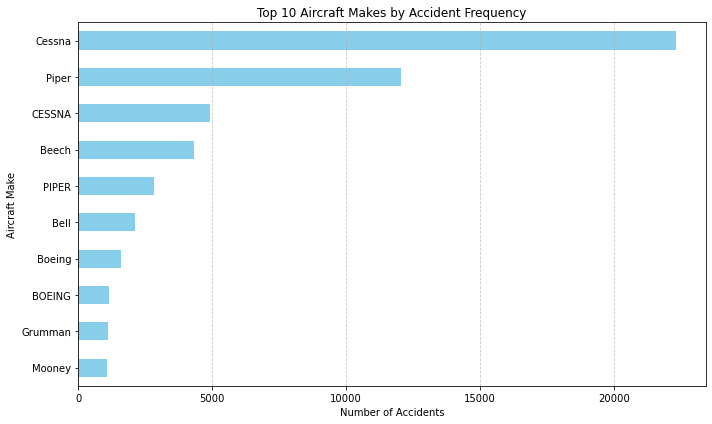

In [19]:
# Count accidents by Make
make_counts = df['Make'].value_counts().head(10)  # Top 10 makes

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
make_counts.plot(kind='barh', color='skyblue')
plt.title('Top 10 Aircraft Makes by Accident Frequency')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make')
plt.gca().invert_yaxis()  # Invert for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- The chart illustrates that the Cessna aircraft experienced the highest number of accidents.The Mooney aircraft experienced the least number of accidents. 
- This could be due to the widespread use of the Cessna aircraft type (commonly used for general aviation) between the year 1980 and 2020.

### 3.2 Objective 2 : Determining Factors Contributing to Aircarft Accidents

#### Bar Chart: Frequency of Accidents by Weather Conditions

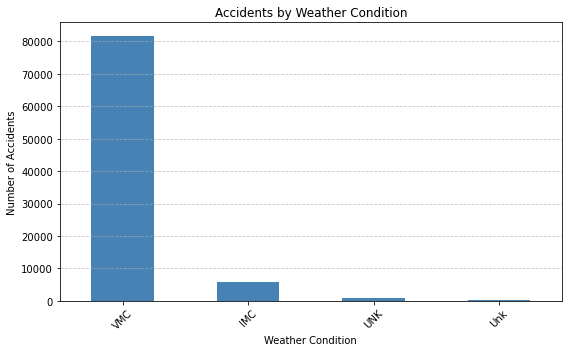

In [20]:
# Count accidents by Weather Condition
weather_counts = df['Weather.Condition'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
weather_counts.plot(kind='bar', color='steelblue')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- The chart above illustrates higher number of (Visual Meteoroligal Conditions) VMC-related accidents compared to (Instrument Meteorological Conditions) IMC-related accidents.
- It implies that there was a combination of factors; a larger population of VFR pilots, a greater likelihood of marginal weather conditions, and a lower skill level of pilots in VMC environments which contributed to more VMC-related accidents compared to IMC-related ones.

#### Histogram: Frequency of Accidents During Different Broad Phases of Flight

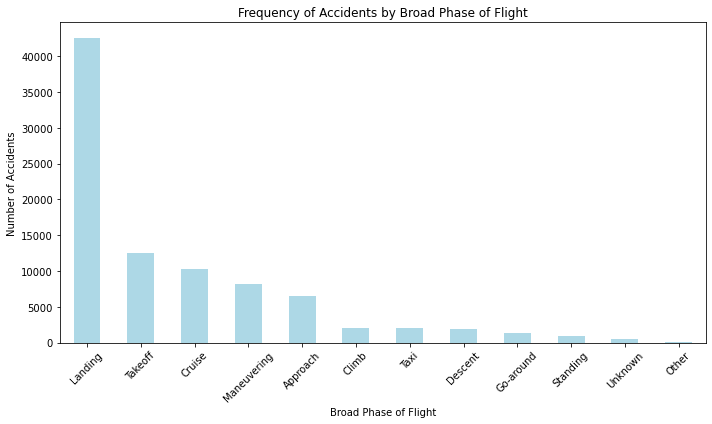

In [21]:
# Group by Broad Phase of Flight
plt.figure(figsize=(10, 6))
df['Broad.phase.of.flight'].value_counts().plot(kind='bar', color='lightblue')

# Add titles and labels
plt.title('Frequency of Accidents by Broad Phase of Flight')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- From the histogram, the landing phase shows the highest/most frequent aircraft accident occurrence.
- The landing phase of flight is often cited as the phase of flight with the highest frequency of aircraft accidents. This is due to several factors, ranging from the complexity of the landing maneuver to the physical and environmental conditions that make it more prone to incidents. 

#### Scatter Plot: Total Fatal Injuries Versus Event Date

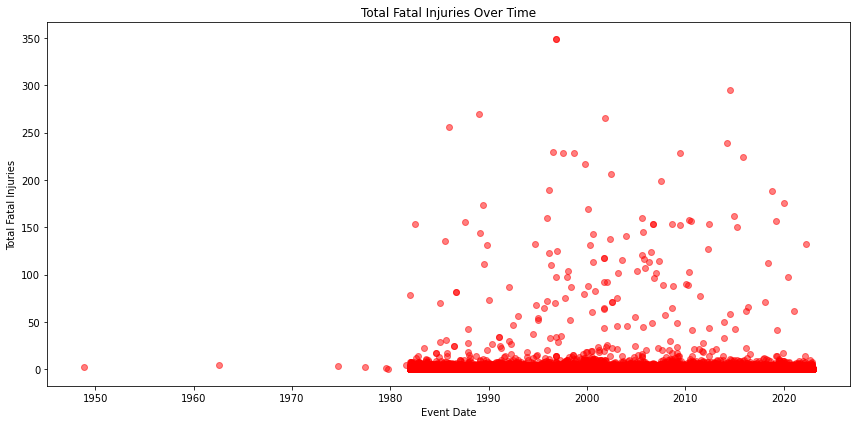

In [22]:
# Convert Event.Date to datetime if not already done
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Event.Date'], df['Total.Fatal.Injuries'], alpha=0.5, color='red')

# Add titles and labels
plt.title('Total Fatal Injuries Over Time')
plt.xlabel('Event Date')
plt.ylabel('Total Fatal Injuries')
plt.tight_layout()
plt.show()

- The plot shows an increase in aircraft accidents between the years 1980 and 2020.
- A sudden increase in aircraft accidents in this period can be attributed to several factors, which may include changes in aviation trends, technological developments, safety practices, regulatory changes, and other external influences.

### 3.3 Objective 3 : Providing additional data insights to support informed business decisions

#### Line Chart: Monthly Trends in Accidents

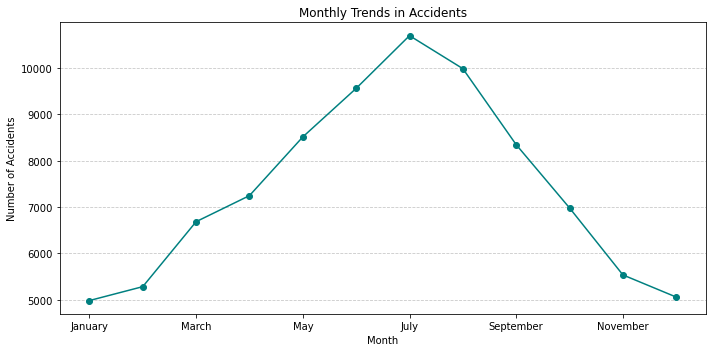

In [23]:
# Convert Event.Date to datetime and extract month
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Month'] = df['Event.Date'].dt.month_name()

# Count accidents by month
monthly_counts = df['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot line chart
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Trends in Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- The graph above illustrates a peak in the number of aircraft accidents in July for the period of time covering the dataset.
- This is possibly because July is part of the summer travel season in the United States,hence a higher number of flights and consequently increased risk of accidents due to pilot fatigue and changing weather.

#### Multi-Line Plot: Injuries Over Time (Total.Fatal.Injuries, Total.Serious.Injuries)

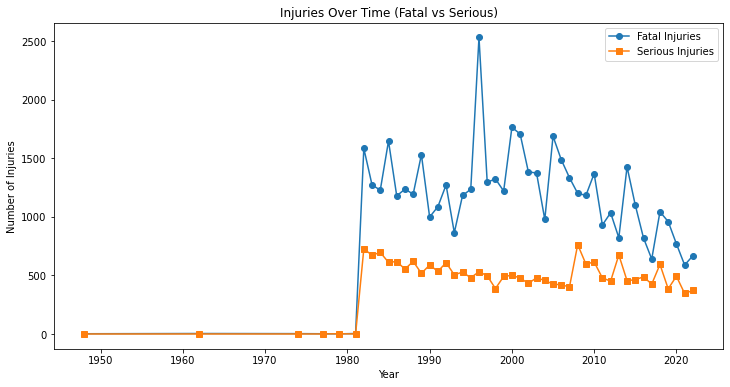

In [24]:
# Convert Event.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Group data by year and sum up injuries
time_data = df.groupby(df['Event.Date'].dt.year).agg(
    Total_Fatal_Injuries=('Total.Fatal.Injuries', 'sum'),
    Total_Serious_Injuries=('Total.Serious.Injuries', 'sum')
).reset_index()

# Plot multi-line chart
plt.figure(figsize=(12, 6))

plt.plot(time_data['Event.Date'], time_data['Total_Fatal_Injuries'], marker='o', label='Fatal Injuries')
plt.plot(time_data['Event.Date'], time_data['Total_Serious_Injuries'], marker='s', label='Serious Injuries')

plt.title('Injuries Over Time (Fatal vs Serious)')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.legend()

- The plot shows that there was a peak in the number of fatal injuries between 1990 and 2000.
- This can be attributed to several factors; while overall aviation safety was improving, the period also saw challenges related to older aircraft and the complexity of managing more air traffic, which contributed to higher fatality rates during that time. 

#### horizontal bar chart : Accident Frequency by Top 10 Air.Carrier 

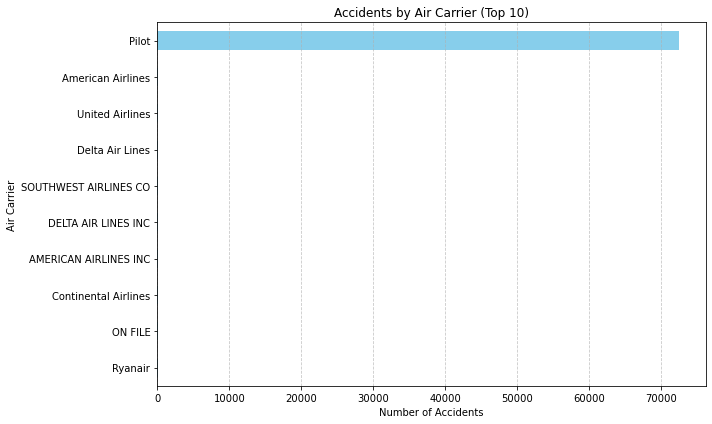

In [25]:
# Count accidents by Air Carrier
air_carrier_counts = df['Air.carrier'].value_counts().head(10)  # Top 10 carriers for better visualization

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
air_carrier_counts.plot(kind='barh', color='skyblue')
plt.title('Accidents by Air Carrier (Top 10)')
plt.xlabel('Number of Accidents')
plt.ylabel('Air Carrier')
plt.gca().invert_yaxis()  # Invert y-axis for a more natural order
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- The chart shows increased aircraft accidents from flights by pilot carriers (general aviation) compared to legacy scheduled carriers (commercial airlines like American Airlines, Delta, etc.). 
- This can be attributed to several critical factors like training, aircraft maintenance, operational environment, and regulations that differentiate personal flights (such as those by private pilots or small aircraft operators) from those flown by commercial carriers.

## 4.0 CONCLUSIONS

In conclusion, and from the Data Analysis Insights:

1. General aviation has higher accident rates compared to commercial aviation, often due to factors like less experienced pilots and lower regulatory oversight.

2. Smaller aircraft are more vulnerable to adverse weather and pilot errors, with critical flight phases such as landing being particularly risky.

3. Seasonal patterns reveal accident peaks during high-traffic months (e.g., July), likely influenced by pilot fatigue and bad weather.

4. Additionally, the rise in fatal injuries between 1990 and 2000 was linked to more severe accident types, the presence of older aircraft, and the growing involvement of general aviation.

5. Stricter regulations, advanced technology and better-trained pilots have significantly improved safety in commercial operations compared to general aviation


## 5.0 RECOMMENDATIONS

These are the recommendations on aircraft selection and risk mitigation strategies to support informed business decisions.

Business Decisions and Recommendations:

1. Operational Risk Mitigation
- Enhance pilot training programs: Focus on simulator training to address critical phases like landing and weather-related decision making.

2. Seasonal and Environmental Risk Management
- Adapt schedules during high-traffic periods: Implement additional safety checks during peak months such as July to mitigate risks tied to increased traffic and pilot fatigue.

3. Fleet Acquisition and Aircraft Safety
- Prioritize purchasing safer aircraft models like Boeing aircraft type: Invest in aircraft types with strong safety records, focusing on those with advanced avionics, enhanced safety systems, and reliable maintenance histories.
- Avoid older or less reliable aircraft from previous years: Older or poorly maintained aircraft have higher accident rates. Establish a policy for retiring aging fleet components to minimize risks.

4. Regulatory and Technological Improvements
- Adopt newer technology for risk monitoring:Equip aircraft with real-time data monitoring tools to detect and alert on anomalies.
- Strengthen safety compliance frameworks: Regularly update operational manuals and audit processes based on the latest data trends.

Financial and Strategic Benefits for Managing these Aircraft Safety Risks:
- Reduced maintenance and repair costs.
- Lower insurance premiums through risk reduction.
- Improved customer trust and satisfaction.
- Successful implementation in other organizations.

